## Exploring a classification task with Keras API for TF 2.0 to predict Breast cancer whether it is Benign or Malignant!

In [4]:
import numpy as np
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('/home/madhu/Downloads/csv/cancer_classification.csv')    # data from UCI ML Breast Cancer Wisconsin (Diagnostic) on kaggle

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


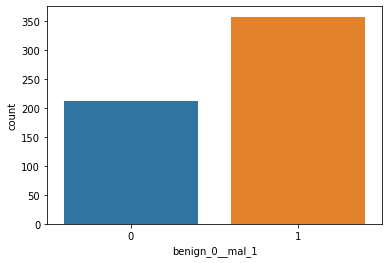

In [11]:
sns.countplot(x='benign_0__mal_1',data=df)

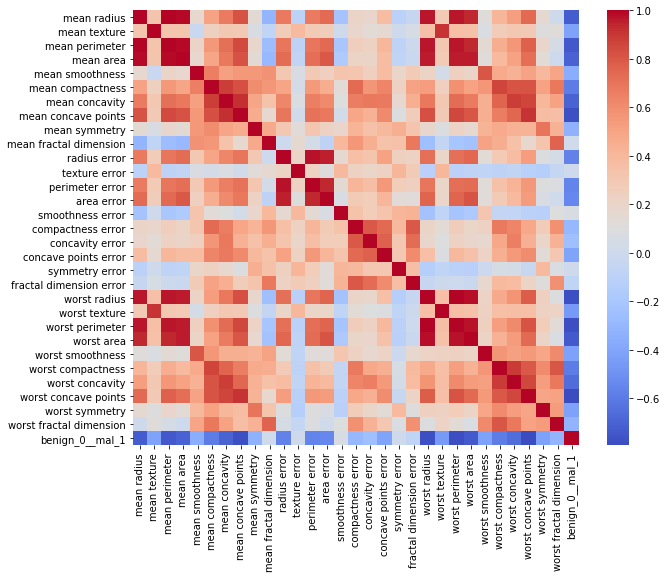

In [18]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), cmap='coolwarm')

In [19]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

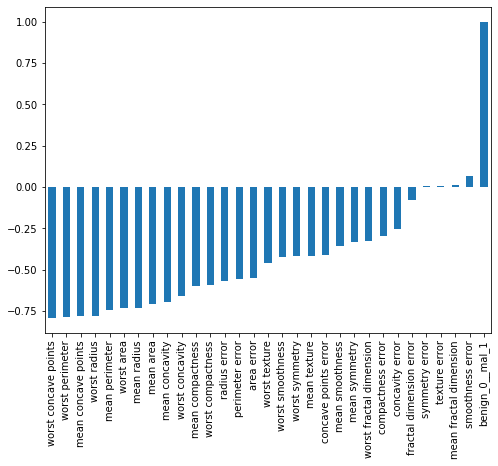

In [21]:
plt.figure(figsize = (8,6))
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

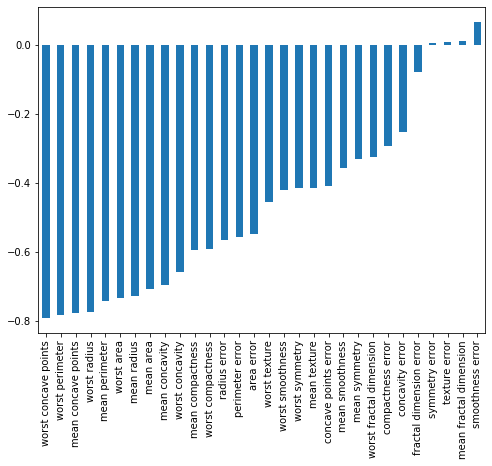

In [22]:
plt.figure(figsize = (8,6))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')    #plotting except target column

**Test-train split**

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

**Scaling the data (Preprocessing)**

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [29]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Creating a model**

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

# Dropout prevents NN from Overfitting by randomly dropping out nodes during training
# Earlystopping Stops training once accuracy stops improving
# Dense is just a densely-connected NN layer

In [31]:
X_train.shape

(426, 30)

In [32]:
X_test.shape

(143, 30)

In [41]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(7,activation='relu'))

model.add(Dense(1,activation='sigmoid'))   # sigmoid, in case of classification model and unit should be 1 i n case of binary calassification

model.compile(optimizer='adam', loss='binary_crossentropy')

**Training the model**

In [42]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1)

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6759 - val_loss: 0.6601
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6378 - val_loss: 0.6203
Epoch 3/600
14/14 [==============================] - 1s 53ms/step - loss: 0.6008 - val_loss: 0.5783
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5563 - val_loss: 0.5318
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5080 - val_loss: 0.4786
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4545 - val_loss: 0.4220
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4000 - val_loss: 0.3641
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3481 - val_loss: 0.3188
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3038 - val_loss: 0.2741
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2671 - val_loss: 0.2392
Epoch 11

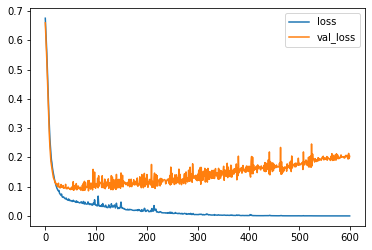

In [43]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

**Since its an overfitting, we'll  be using early stopping**

In [44]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [47]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [48]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6396 - val_loss: 0.6202
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5971 - val_loss: 0.5823
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5565 - val_loss: 0.5372
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5115 - val_loss: 0.4883
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4686 - val_loss: 0.4425
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4245 - val_loss: 0.3989
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3828 - val_loss: 0.3513
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3447 - val_loss: 0.3147
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3134 - val_loss: 0.2811
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.2849 - val_loss: 0.2530
Epoch 11/

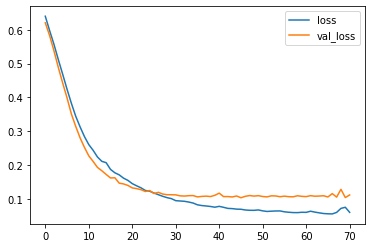

In [49]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

**Adding Dropout layors**

In [50]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [51]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.7017 - val_loss: 0.6862
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6883 - val_loss: 0.6774
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6812 - val_loss: 0.6689
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6688 - val_loss: 0.6580
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6576 - val_loss: 0.6460
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6503 - val_loss: 0.6316
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6420 - val_loss: 0.6190
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6240 - val_loss: 0.6070
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6082 - val_loss: 0.5897
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5953 - val_loss: 0.5711
Epoch 11

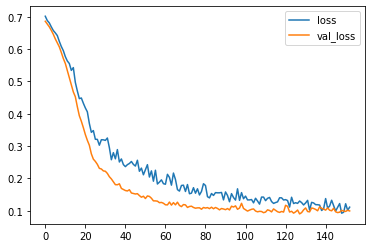

In [52]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

**Model evaluation**

In [54]:
pred = model.predict_classes(X_test)

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

[[54  1]
 [ 2 86]]


**The above scores of classification report and the confusion matrix is pretty much good!**